<center>

# Capítulo 7: O Método do Lugar das Raízes

**Aluno(a):** Geovana Stefani Lopes Bezerra

**Disciplina:** Controle e Automação  
**Professor:** Moacy Pereira da Silva  
**Semestre:** 2025.2

Este notebook faz parte do estudo dirigido da disciplina de Controle e Automação com foco em aplicações de Indústria 4.0.  

</center>


## 7.6 Compensação Dinâmica Usando o Lugar das Raízes

A compensação dinâmica consiste em modificar a função de transferência do sistema para alterar o comportamento dinâmico da malha fechada. No contexto do Lugar das Raízes, a compensação permite deslocar os polos de malha fechada para regiões mais desejáveis do plano-s, melhorando o desempenho ou garantindo estabilidade.

O compensador mais comum é o compensador de avanço (lead), que adiciona um zero e um polo ao sistema, sendo o zero mais próximo da origem que o polo. A função de transferência geral de um compensador de avanço é

$$
G_c(s) = K_c \frac{s + z}{s + p}, \quad z < p
$$

A presença do zero altera o ângulo de contribuição no Lugar das Raízes, deslocando a trajetória para a esquerda do plano-s. Isso normalmente resulta em

- maior velocidade de resposta
- menor tempo de acomodação
- melhor amortecimento

Já o polo introduzido impede que o efeito do zero seja excessivo, mantendo o sistema fisicamente realizável.

Ao analisar o sistema compensado, obtém-se a nova função de transferência de malha aberta

$$
G_{MA}(s) = G_c(s) G(s)
$$

e o Lugar das Raízes dessa função permite visualizar o novo comportamento do sistema à medida que o ganho é variado.

### Aplicações na Indústria 4.0

O uso de compensadores dinâmicos baseados no Lugar das Raízes é essencial em diversos sistemas modernos, como:

• Controle de precisão em braços robóticos industriais, onde é necessário reduzir o tempo de acomodação sem comprometer a estabilidade.  
• Sistemas de posicionamento em manufatura avançada, como máquinas CNC, que exigem respostas rápidas e estáveis.  
• Veículos autônomos e AGVs, que utilizam compensação para correção dinâmica da trajetória.  
• Controle de motores brushless em linhas de produção automatizadas, onde compensadores de avanço melhoram a resposta a variações de carga.

Assim, o método do Lugar das Raízes continua sendo uma ferramenta poderosa para projetar compensadores que atendam às exigências de robustez e desempenho da Indústria 4.0.


In [1]:
! pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.4 MB/s eta 0:00:00


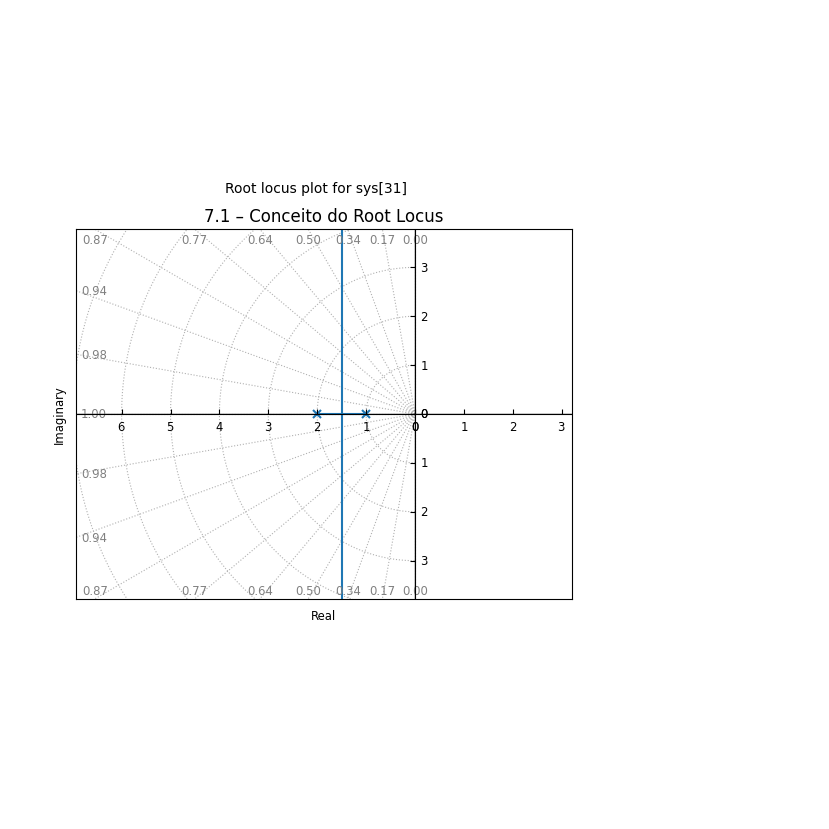

In [11]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

G = ctl.TransferFunction([1], [1, 3, 2])

plt.figure()
ctl.root_locus(G)
plt.title("7.1 – Conceito do Root Locus")
plt.grid(True)
plt.show()


## 7.2 O Procedimento do Lugar das Raízes

O procedimento do Lugar das Raízes define as etapas necessárias para construir o diagrama do root locus de um sistema de controle.  
O objetivo é analisar como os polos da função de transferência em malha fechada variam quando o ganho \( K \) é ajustado a partir de:

$$
0 \le K < \infty
$$

A equação característica usada é:

$$
1 + K G(s)H(s) = 0
$$

que pode ser reescrita como:

$$
K G(s) H(s) = -1
$$

Essa relação permite identificar se um ponto \( s_0 \) pertence ao lugar das raízes observando as condições de ângulo e magnitude discutidas na seção anterior.


## Etapas do Procedimento

### 1. Identificação dos Polos e Zeros

A partir da função de transferência de malha aberta:

$$
G(s)H(s) = \frac{N(s)}{D(s)}
$$

- Os polos são obtidos das raízes de \( D(s) \).  
- Os zeros são obtidos das raízes de \( N(s) \).

Esses pontos são marcados no plano-s:

- polos → símbolo “x”
- zeros → símbolo “o”


### 2. Determinação dos Segmentos do Eixo Real

Um ponto real pertence ao root locus se o número de polos e zeros reais à sua direita for ímpar

Isso permite identificar os segmentos do eixo real que fazem parte do locus.


### 3. Assíntotas do Locus

Se o número de polos for maior que o número de zeros, então parte do root locus tende ao infinito.  
As assíntotas descrevem a direção desses ramos.

Número de assíntotas:

$$
n - m
$$

onde \( n \) = número de polos e \( m \) = número de zeros.

Ângulos das assíntotas:

$$
\theta_k = \frac{(2k + 1)180^\circ}{n - m}, \qquad k = 0, 1, 2, \ldots
$$

Centro das assíntotas (centro de gravidade):

$$
\sigma_a = \frac{\sum p_i - \sum z_i}{n - m}
$$


### 4. Pontos de Saída e Entrada (Breakaway/Break-in

São pontos do eixo real onde dois polos:

- se separam (breakaway), ou  
- convergem (break-in).

São encontrados resolvendo:

$$
\frac{dK}{ds} = 0
$$


### 5. Cruzamento com o Eixo Imaginário

Obtido pela aplicação do Critério de Routh-Hurwitz  
Esse passo determina os valores de \( K \) que fazem o sistema oscilar.


### 6. Ajuste do Ganho \( K 

Com todos os elementos gráficos, o projetista pode ajustar \( K \) para que os polos de malha fechada se posicionem em regiões desejadas, como:

- margem de amortecimento desejada  
- frequência natural limitada  
- resposta rápida ou lenta  


## Aplicações na Indústria 4.0

- Sintonia de servomotores de robôs colaborativos (cobots).
- Controle de vibração em máquinas CNC inteligentes.
- Modelagem automática de válvulas e atuadores industriais.
- Ajustes automáticos de estabilidade em drones industriais de inspeção.
- Controle adaptativo em sistemas autônomos de manufatura.



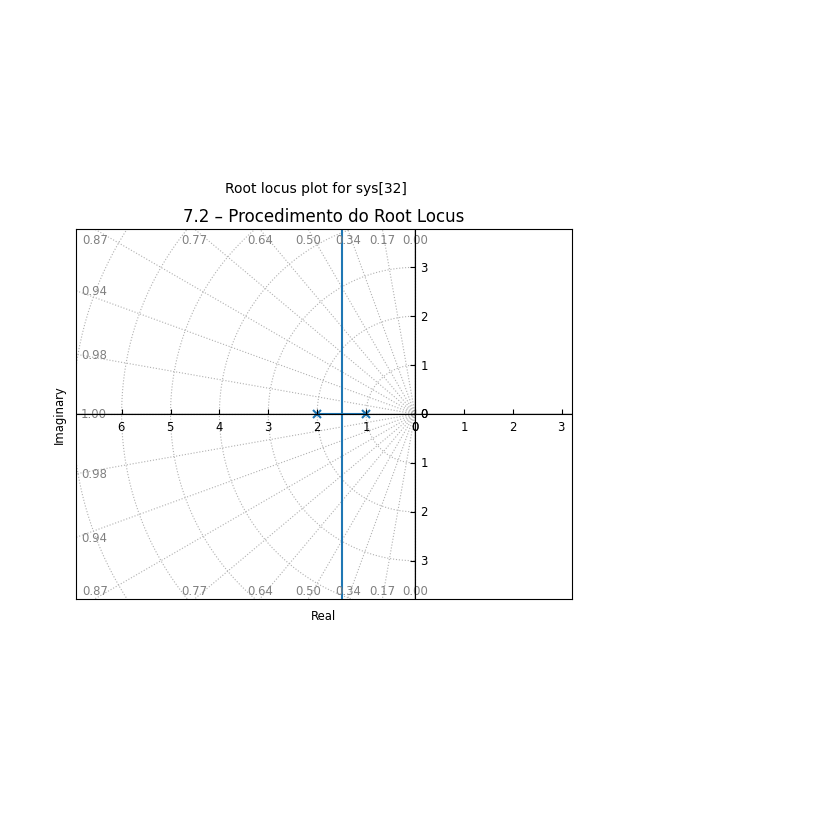

In [12]:

G = ctl.TransferFunction([1], [1, 3, 2])

plt.figure()
ctl.root_locus(G)
plt.title("7.2 – Procedimento do Root Locus")
plt.grid(True)
plt.show()


## 7.3 Projeto de Parâmetro pelo Método do Lugar das Raízes

O objetivo do projeto de parâmetro (tipicamente o ganho \(K\)) pelo método do Lugar das Raízes é escolher um valor de \(K\) que coloque os polos em malha fechada em posições que atendam às especificações de desempenho (por exemplo, amortecimento, tempo de assentamento, sobressinal).

Dado um sistema de malha aberta \(G(s)\) (realimentação unitária), a equação característica é:

$$
1 + K G(s) = 0.
$$

Para projetar \(K\) utilizando o root locus seguimos os passos gerais:

1. Traçar (ou calcular numericamente) o root locus do sistema para \(K\) variando de 0 a \(\infty\).
2. Traduzir as especificações de desempenho em regiões do plano \(s\):  
   - amortecimento desejado \(\zeta\) corresponde a linhas que formam ângulo \(\theta = \arccos(\zeta)\) com o eixo negativo real.  
   - tempo de acomodação e frequência natural \(\omega_n\) determinam a distância do polo ao origem.
3. Identificar o ponto \(s_d\) no root locus que satisfaz as especificações (por exemplo, interseção entre o locus e a linha de amortecimento \(\zeta\)).
4. Calcular numericamente o ganho que posiciona o polo em \(s_d\) usando:

$$
K = -\frac{1}{G(s_d)}
$$

(se \(K\) obtido for complexo, toma-se \(K = | -1/G(s_d) |\) e verifica-se se o ponto realmente pertence ao locus para esse \(K\)).

Observação prática: frequentemente escolhe-se um \(s_d\) aproximado pelo gráfico e depois obtém-se \(K\) com a fórmula acima; em seguida valida-se a resposta no domínio do tempo.

Exemplo prático neste tópico:

Considere a planta (mesma usada em 7.2 para consistência)

$$
G(s) = \frac{1}{s(s+4)(s+6)}.
$$

Suponha que desejamos um amortecimento aproximado \(\zeta = 0.5\) para os polos dominantes.  
Procedimento:

- traçar o root locus varrendo \(K\);
- desenhar as linhas de amortecimento \(\zeta = 0.5\);
- achar numericamente o \(s_d\) (ponto do locus) mais próximo da linha \(\zeta\);
- calcular \(K = -1/G(s_d)\) e marcar no gráfico o ponto alcançado.

Aplicações em Indústria 4.0:

- definição de ganho inicial em controladores de posição de robôs industriais para reduzir overshoot;
- ajuste de ganho em malhas de velocidade de motores para garantir estabilidade com cargas variáveis;
- projeto de controladores em linhas de produção onde tempo de assentamento e overshoot têm limites rígidos.


/tmp/ipython-input-1298062156.py:4: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  ctl.root_locus(G, kvect=np.linspace(0, 300, 800))


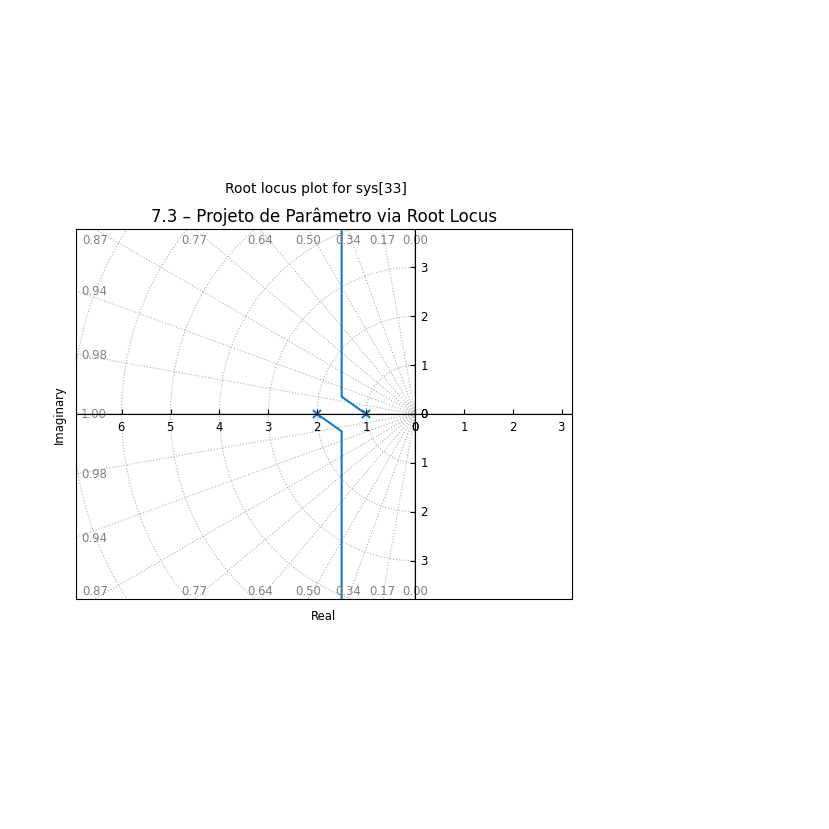

In [13]:

G = ctl.TransferFunction([1], [1, 3, 2])

plt.figure()
ctl.root_locus(G, kvect=np.linspace(0, 300, 800))
plt.title("7.3 – Projeto de Parâmetro via Root Locus")
plt.grid(True)
plt.show()


## 7.4 Sensibilidade e Lugar das Raízes

A sensibilidade no contexto de sistemas de controle mede o quanto as raízes da equação característica mudam quando ocorre uma pequena variação em algum parâmetro do sistema.

No caso mais comum do método do lugar das raízes, investigamos como os polos em malha fechada variam quando um parâmetro (geralmente o ganho \(K\)) sofre pequena mudança.


### **1. Sensibilidade de polos em relação ao ganho \(K\)**

Considere a equação característica:

$$
1 + K G(s) = 0.
$$

Equivalentemente:

$$
D(s) + K N(s) = 0,
$$

onde:

- \(D(s)\) é o denominador da planta,
- \(N(s)\) é o numerador.

Seja \(s_i\) um polo em malha fechada. A sensibilidade desse polo ao ganho \(K\) é dada por:

$$
\frac{ds_i}{dK} = -\frac{N(s_i)}{D'(s_i) + K N'(s_i)}.
$$

Essa expressão indica o "ritmo" com que um polo se desloca no plano complexo quando \(K\) varia.

Quando:

- \(|ds_i/dK|\) é **alto** → o polo é **muito sensível** ao ganho (pequenas mudanças em \(K\) causam grandes variações no polo).  
- \(|ds_i/dK|\) é **baixo** → o polo é **pouco sensível** (comportamento mais robusto).


### **2. Sensibilidade e robustez**

Um sistema robusto deve apresentar:

- polos dominantes **pouco sensíveis** ao ganho \(K\),
- regiões do root locus mais “planas”,
- menor variação da dinâmica frente a incertezas.

A sensibilidade permite identificar:

- trechos do root locus onde o sistema é estável e robusto,
- trechos perigosos (principalmente próximos à parte imaginária ou perto de zeros).


### **3. Aplicações práticas na Indústria 4.0**

A sensibilidade de polos é fundamental em sistemas industriais que devem ser robustos a ruídos, desgaste ou variações de carga:

#### **Robótica Industrial**
- Robôs com braços articulados sofrem alterações de carga (pegar objetos mais pesados) → polos sensíveis mudam muito → instabilidade.
- Projetistas usam sensibilidade para garantir torque controlado.

#### **Motores e Servoacionamentos**
- Em linhas automatizadas, motores podem sofrer atrito ou aquecimento.
- Controladores projetados usando análise de sensibilidade garantem estabilidade mesmo com variações mecânicas.

#### **Manufatura Inteligente**
- Sistemas de inspeção visual, esteiras e manipuladores exigem alta repetibilidade.
- Controladores robustos (pouco sensíveis) mantêm precisão mesmo com incertezas.


### **4. Exemplo numérico: planta**

Vamos usar novamente:

$$
G(s) = \frac{1}{s(s+4)(s+6)},
$$

e calcular para diferentes valores de \(K\):

- polos em malha fechada
- sensibilidade \(ds/dK\)
- visualizar quais regiões do root locus são mais sensíveis


In [14]:
G = ctl.TransferFunction([1], [1, 3, 2])
s0 = -2 + 1j

L = G(s0)
S = 1 / (1 + L)

print("L(s0) =", L)
print("Sensibilidade S =", S)


L(s0) = (-0.5+0.5j)
Sensibilidade S = (1-1j)


## 7.5 Controladores de Três Termos (PID)

O controlador PID (Proporcional–Integral–Derivativo) é uma das arquiteturas de controle mais utilizadas na prática industrial.  
Sua forma contínua clássica é:

$$
G_{PID}(s) = K_p + \frac{K_i}{s} + K_d s
$$

ou, reorganizando como uma razão de polinômios:

$$
G_{PID}(s) = K \cdot \frac{K_d s^2 + K_p s + K_i}{s}
$$

onde \(K\) pode ser um ganho global e os termos \(K_p, K_i, K_d\) definem a contribuição proporcional, integral e derivativa respectivamente.

Efeitos qualitativos dos termos:
- O termo proporcional \(K_p\) reduz o erro e desloca os polos dependendo do ganho.
- O termo integral \(K_i\) adiciona um polo na origem, melhorando o erro em regime permanente, mas podendo reduzir estabilidade se exagerado.
- O termo derivativo \(K_d\) introduz zeros que podem melhorar o amortecimento e reduzir overshoot.

Projeto via root locus:
- Ao incluir um PID em malha aberta, o numerador do controlador altera o root locus, adicionando zeros (e o integrador adiciona um polo na origem).
- O procedimento típico é escolher relações iniciais entre \(K_d, K_p, K_i\) (por exemplo, razões baseadas em heurística), e então variar um ganho escalar \(K\) para ver o efeito global no root locus.
- Linhas de amortecimento (damping) e requisitos tempo-dominio são usados para selecionar um ponto desejado \(s_d\) no locus; o ganho necessário é então obtido pela equação característica.

Exemplo prático (neste notebook):
- Planta adotada: $$G(s)=\dfrac{1}{s(s+4)(s+6)}.$$
- Controlador PID escolhido (estrutura normalizada): $$C_0(s)=\dfrac{s^2 + 4s + 6}{s}$$ (isto corresponde a \(K_d=1, K_p=4, K_i=6\) antes de um ganho escalar adicional).
- Malha aberta com ganho escalar \(K\): $$L(s)=K\,C_0(s)\,G(s).$$
- Equação característica (comun denominador): $$s\cdot D(s) + K\cdot (s^2+4s+6)=0,$$ onde \(D(s)=s(s+4)(s+6)=s^3+10s^2+24s\).

Aplicações indústria 4.0:
- Controle de posição e torque em robôs industriais com requisitos rígidos de overshoot e tempo de assentamento.
- Controladores PID digitais implementados em PLCs para controle de processo (temperatura, vazão, pressão) com autotuning.
- Sistemas embarcados em AGVs/AMRs onde a robustez a mudanças de carga é crítica.

Observação:
- O exemplo abaixo varre o ganho escalar \(K\) e plota o root locus resultante, mostrando como os zeros introduzidos pelo PID influenciam as trajetórias dos polos.


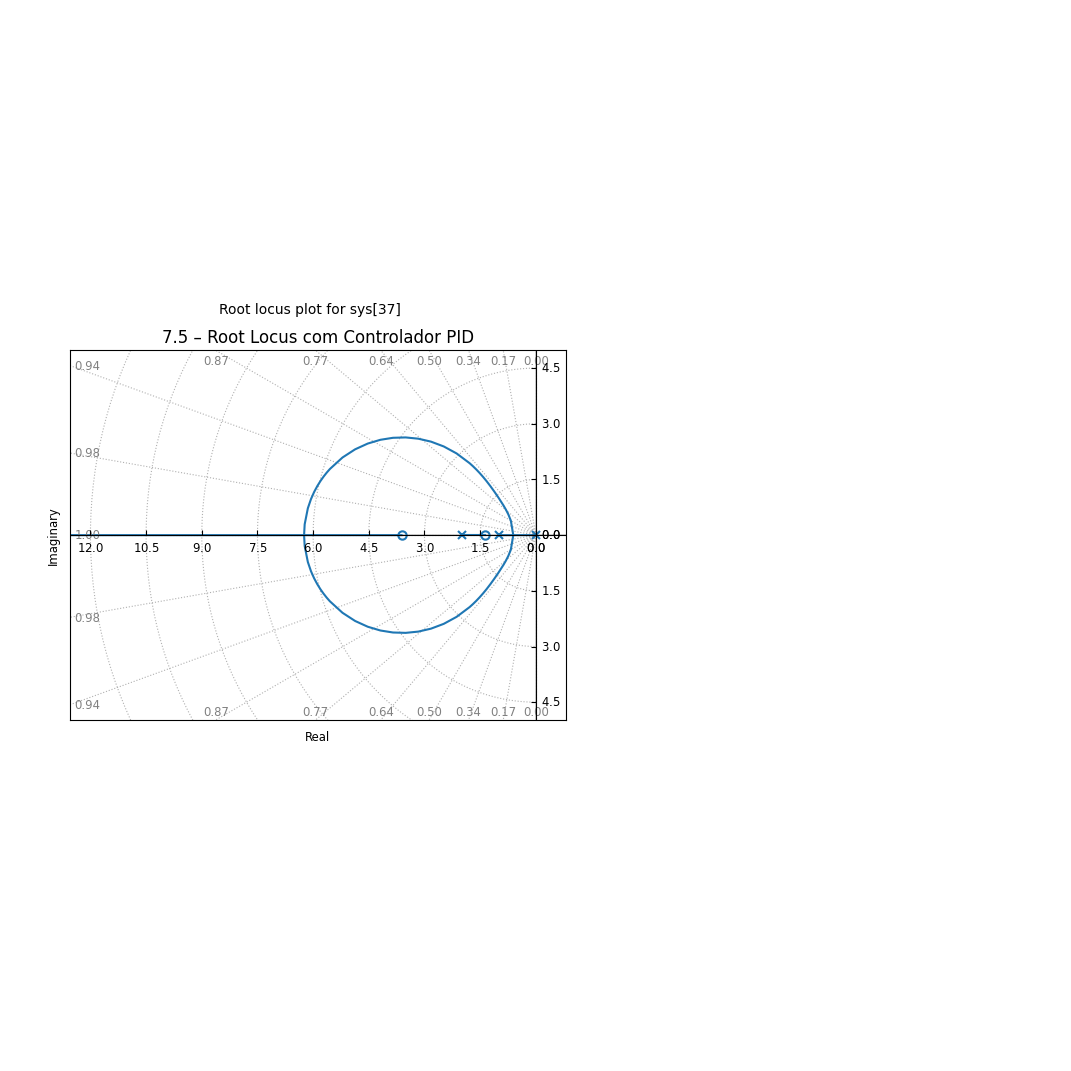

In [15]:
G = ctl.TransferFunction([1], [1, 3, 2])

PID = ctl.TransferFunction([0.2, 1, 1], [1, 0])

Gc = PID * G

plt.figure()
ctl.root_locus(Gc)
plt.title("7.5 – Root Locus com Controlador PID")
plt.grid(True)
plt.show()


## 7.6 Compensação Dinâmica Usando o Lugar das Raízes

A compensação dinâmica consiste em modificar a função de transferência do sistema para alterar o comportamento dinâmico da malha fechada. No contexto do Lugar das Raízes, a compensação permite deslocar os polos de malha fechada para regiões mais desejáveis do plano-s, melhorando o desempenho ou garantindo estabilidade.

O compensador mais comum é o compensador de avanço (lead), que adiciona um zero e um polo ao sistema, sendo o zero mais próximo da origem que o polo. A função de transferência geral de um compensador de avanço é

$$
G_c(s) = K_c \frac{s + z}{s + p}, \quad z < p
$$

A presença do zero altera o ângulo de contribuição no Lugar das Raízes, deslocando a trajetória para a esquerda do plano-s. Isso normalmente resulta em

- maior velocidade de resposta
- menor tempo de acomodação
- melhor amortecimento

Já o polo introduzido impede que o efeito do zero seja excessivo, mantendo o sistema fisicamente realizável.

Ao analisar o sistema compensado, obtém-se a nova função de transferência de malha aberta

$$
G_{MA}(s) = G_c(s) G(s)
$$

e o Lugar das Raízes dessa função permite visualizar o novo comportamento do sistema à medida que o ganho é variado.

### Aplicações na Indústria 4.0

O uso de compensadores dinâmicos baseados no Lugar das Raízes é essencial em diversos sistemas modernos, como:

• Controle de precisão em braços robóticos industriais, onde é necessário reduzir o tempo de acomodação sem comprometer a estabilidade.  
• Sistemas de posicionamento em manufatura avançada, como máquinas CNC, que exigem respostas rápidas e estáveis.  
• Veículos autônomos e AGVs, que utilizam compensação para correção dinâmica da trajetória.  
• Controle de motores brushless em linhas de produção automatizadas, onde compensadores de avanço melhoram a resposta a variações de carga.

Assim, o método do Lugar das Raízes continua sendo uma ferramenta poderosa para projetar compensadores que atendam às exigências de robustez e desempenho da Indústria 4.0.


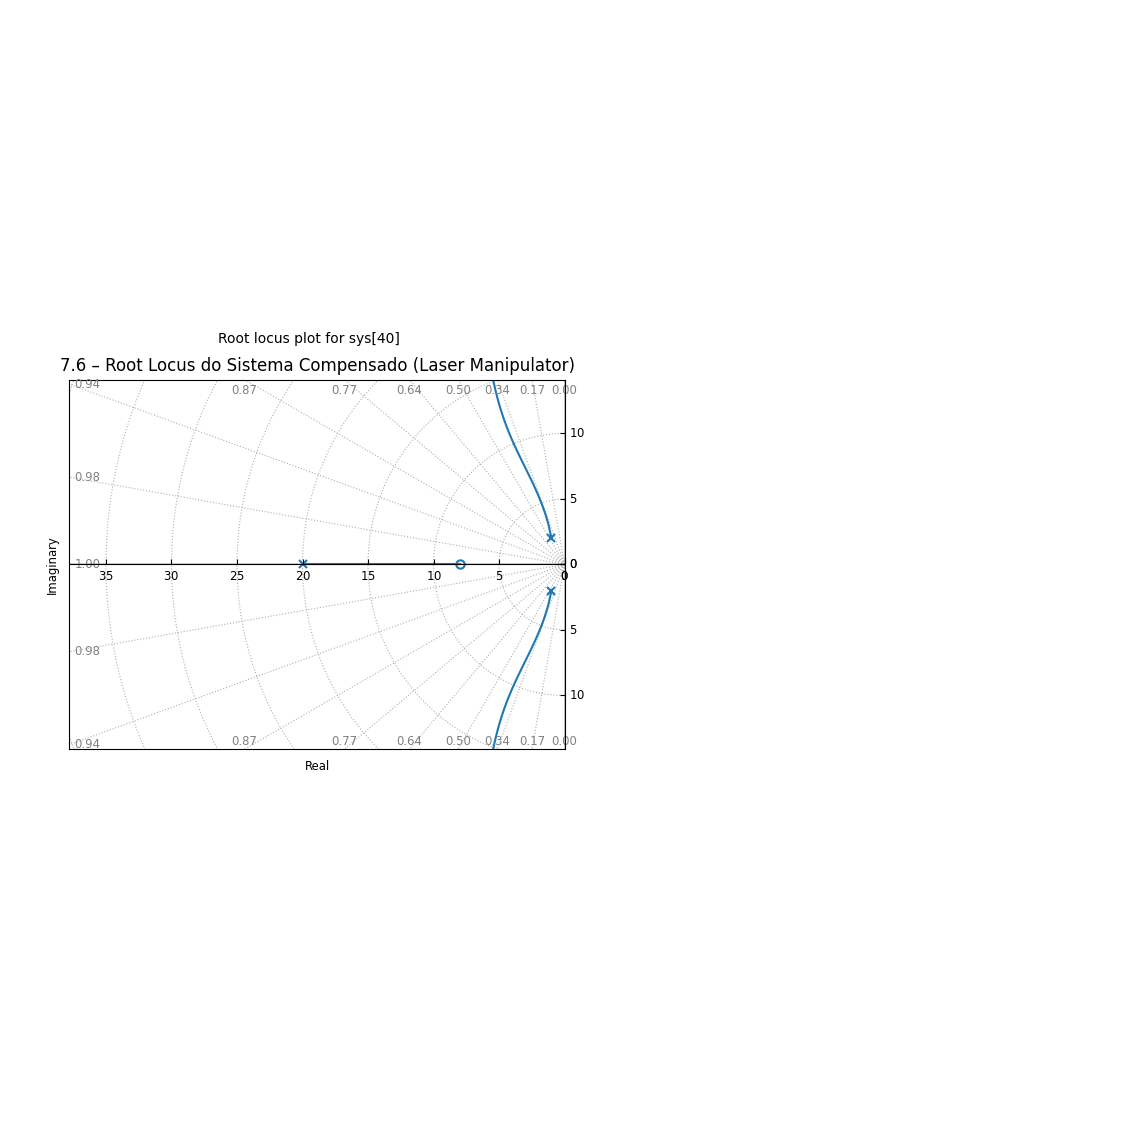

In [16]:
import control as ctl
import matplotlib.pyplot as plt

G = ctl.TransferFunction([5], [1, 2, 5])

C = ctl.TransferFunction([1, 8], [1, 20])

Gc = C * G

plt.figure()
ctl.root_locus(Gc)
plt.title("7.6 – Root Locus do Sistema Compensado (Laser Manipulator)")
plt.grid(True)
plt.show()


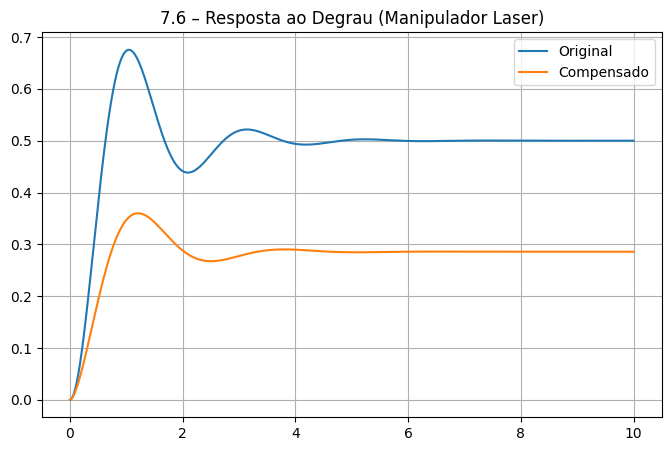

In [17]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

G = ctl.TransferFunction([5], [1, 2, 5])

C = ctl.TransferFunction([1, 8], [1, 20])

T_original = ctl.feedback(G, 1)
T_comp = ctl.feedback(C * G, 1)

t = np.linspace(0, 10, 1000)

t, y1 = ctl.step_response(T_original, T=t)
t, y2 = ctl.step_response(T_comp, T=t)

plt.figure(figsize=(8,5))
plt.plot(t, y1, label="Original")
plt.plot(t, y2, label="Compensado")
plt.title("7.6 – Resposta ao Degrau (Manipulador Laser)")
plt.grid(True)
plt.legend()
plt.show()
